# MICTI tutorial

We collected single-cell RNA-Seq dataset from six different immune cell types. We performed TPM normaization for each of the cells.



In [1]:
import pandas as pa
#%matplotlib notebook

In [2]:
datamatrix=pa.read_csv("data/dataset.txt", sep="\t", index_col="genes")

In [3]:
datamatrix.shape

(13888, 1153)

In [4]:
datamatrix.iloc[:10,:10] 

,GSM2181141,GSM2181122,GSM2181113,GSM2180862,GSM2181258,GSM2181201,GSM2180840,GSM2181133,GSM2181089,GSM2180853
genes,,,,,,,,,,
A1BG,0.000000,0.043549,0.054509,0.000000,0.000000,0.066542,0.605715,0.651164,0.095305,0.000000
A1CF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2ML1,0.046830,0.071208,0.018045,0.000000,0.000000,0.023222,0.531418,0.050903,0.098627,0.000000
A4GALT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AAAS,39.244719,4.173193,28.947780,0.000000,67.050516,97.502654,0.000000,2.375844,88.972850,341.262077
AACS,0.623697,0.401357,0.362420,0.777686,0.270946,0.893264,0.860927,0.546757,1.002484,0.000000
AADACL3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AADAT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


More information about the samples can be found from the metadata information. Metadata information contains disease stages, tissue catagory, sample source and other important information about the sample/cell. From the metadata table we extracted cell types/sample source in order to classify our cells according to cell type. 

In [5]:
metadata=pa.read_csv("data/metadata.txt", sep="\t", index_col="SampleID")


In [6]:
metadata.iloc[:5,1:10]


,SubjectID,DiseaseCategory,TissueCategory,BamFileName,CellType,Description,DiseaseStage,DiseaseState,Ethnicity
SampleID,,,,,,,,,
GSM2181141,No Info,hematologic cancer,hematopoietic system,EGAX00001437341.bam,lymphoblast,processed data file = cell_line_FPKM.csv,No Info,chronic myeloid leukemia (CML),No Info
GSM2181122,No Info,hematologic cancer,hematopoietic system,EGAX00001437284.bam,lymphoblast,processed data file = cell_line_FPKM.csv,No Info,chronic myeloid leukemia (CML),No Info
GSM2181113,No Info,hematologic cancer,hematopoietic system,EGAX00001437257.bam,lymphoblast,processed data file = cell_line_FPKM.csv,No Info,chronic myeloid leukemia (CML),No Info
GSM2180862,No Info,hematologic cancer,hematopoietic system,EGAX00001437608.bam,B cell,processed data file = cell_line_FPKM.csv,No Info,B-cell lymphoma,No Info
GSM2181258,No Info,hematologic cancer,hematopoietic system,EGAX00001439870.bam,B cell,processed data file = cell_line_FPKM.csv,No Info,B-cell lymphoma,No Info


Now we have cell-type information for each of our samples/cells from the metadata table. So we wanted to get markers for each of the cell-types using MICTI 

In [7]:
cell_type=list(metadata["CellType"])


In [8]:
geneName=list(datamatrix.index)
cellName=list(datamatrix.columns)


In [9]:
datamatrix.shape


(13888, 1153)

In [10]:
print(geneName[:10])


['A1BG', 'A1CF', 'A2M', 'A2ML1', 'A4GALT', 'AAAS', 'AACS', 'AADACL3', 'AADAT', 'AAED1']


In [11]:
print(cellName[:10])


['GSM2181141', 'GSM2181122', 'GSM2181113', 'GSM2180862', 'GSM2181258', 'GSM2181201', 'GSM2180840', 'GSM2181133', 'GSM2181089', 'GSM2180853']


In [12]:
set(cell_type)


{'B cell',
 'CD4+ memory T cell',
 'CD8+ memory T cell',
 'conventional dendritic cell',
 'fibroblast',
 'lymphoblast'}

In [13]:
import imp
import MICTI
imp.reload(MICTI)
from MICTI import MARKER

/usr/local/lib/python3.5/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.25.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


# Creating MICTI object for known cell-types

In [14]:
mictiObject=MARKER.MICTI(datamatrix.T, geneName, cellName, cluster_assignment=cell_type , k=None, th=0, normalized=True, ensembel=False, organisum="hsapiens")

Visualize the 2D T-SNE plot.

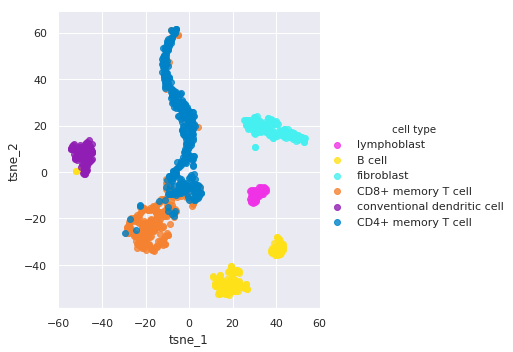

In [15]:
mictiObject.get_Visualization(dim=2, method="tsne")

# Markers by cluster number

 cluster-1 is CD4+ Markers

In [16]:
sig_genes=mictiObject.get_markers_by_Pvalues_and_Zscore(1, threshold_pvalue=.01,threshold_z_score=0)
sig_genes

,Adj P-value,Z_scores,p_value
CSF2,0.000000e+00,20.313988,0.000000e+00
IL2RG,0.000000e+00,12.560409,0.000000e+00
ATP9B,0.000000e+00,28.123272,0.000000e+00
HIST1H2BK,0.000000e+00,9.118146,0.000000e+00
PATL2,0.000000e+00,9.055203,0.000000e+00
CTLA4,0.000000e+00,8.523849,0.000000e+00
CCL20,0.000000e+00,11.984467,0.000000e+00
MAP3K14,0.000000e+00,32.571130,0.000000e+00
GZMB,0.000000e+00,17.080777,0.000000e+00
GPR171,0.000000e+00,10.677701,0.000000e+00


Plot heatmap for all marker genes in across all cell-types

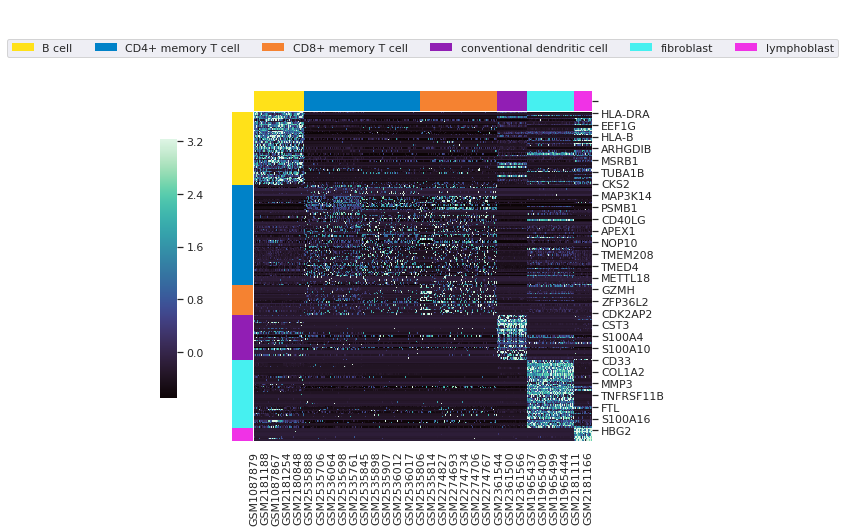

In [17]:
mictiObject.heatMap()

Plot of heatmap for markers spacific to cluster-0 or B cells 

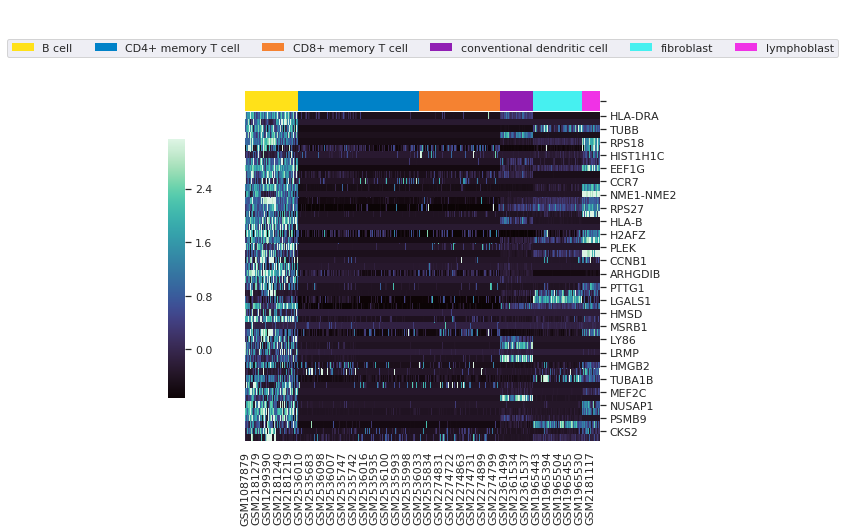

In [18]:
mictiObject.heatMap(cluster_marker=0)

The radar plot for the mean expression of marker genes in their corrosponding cell types scaled to 0-1

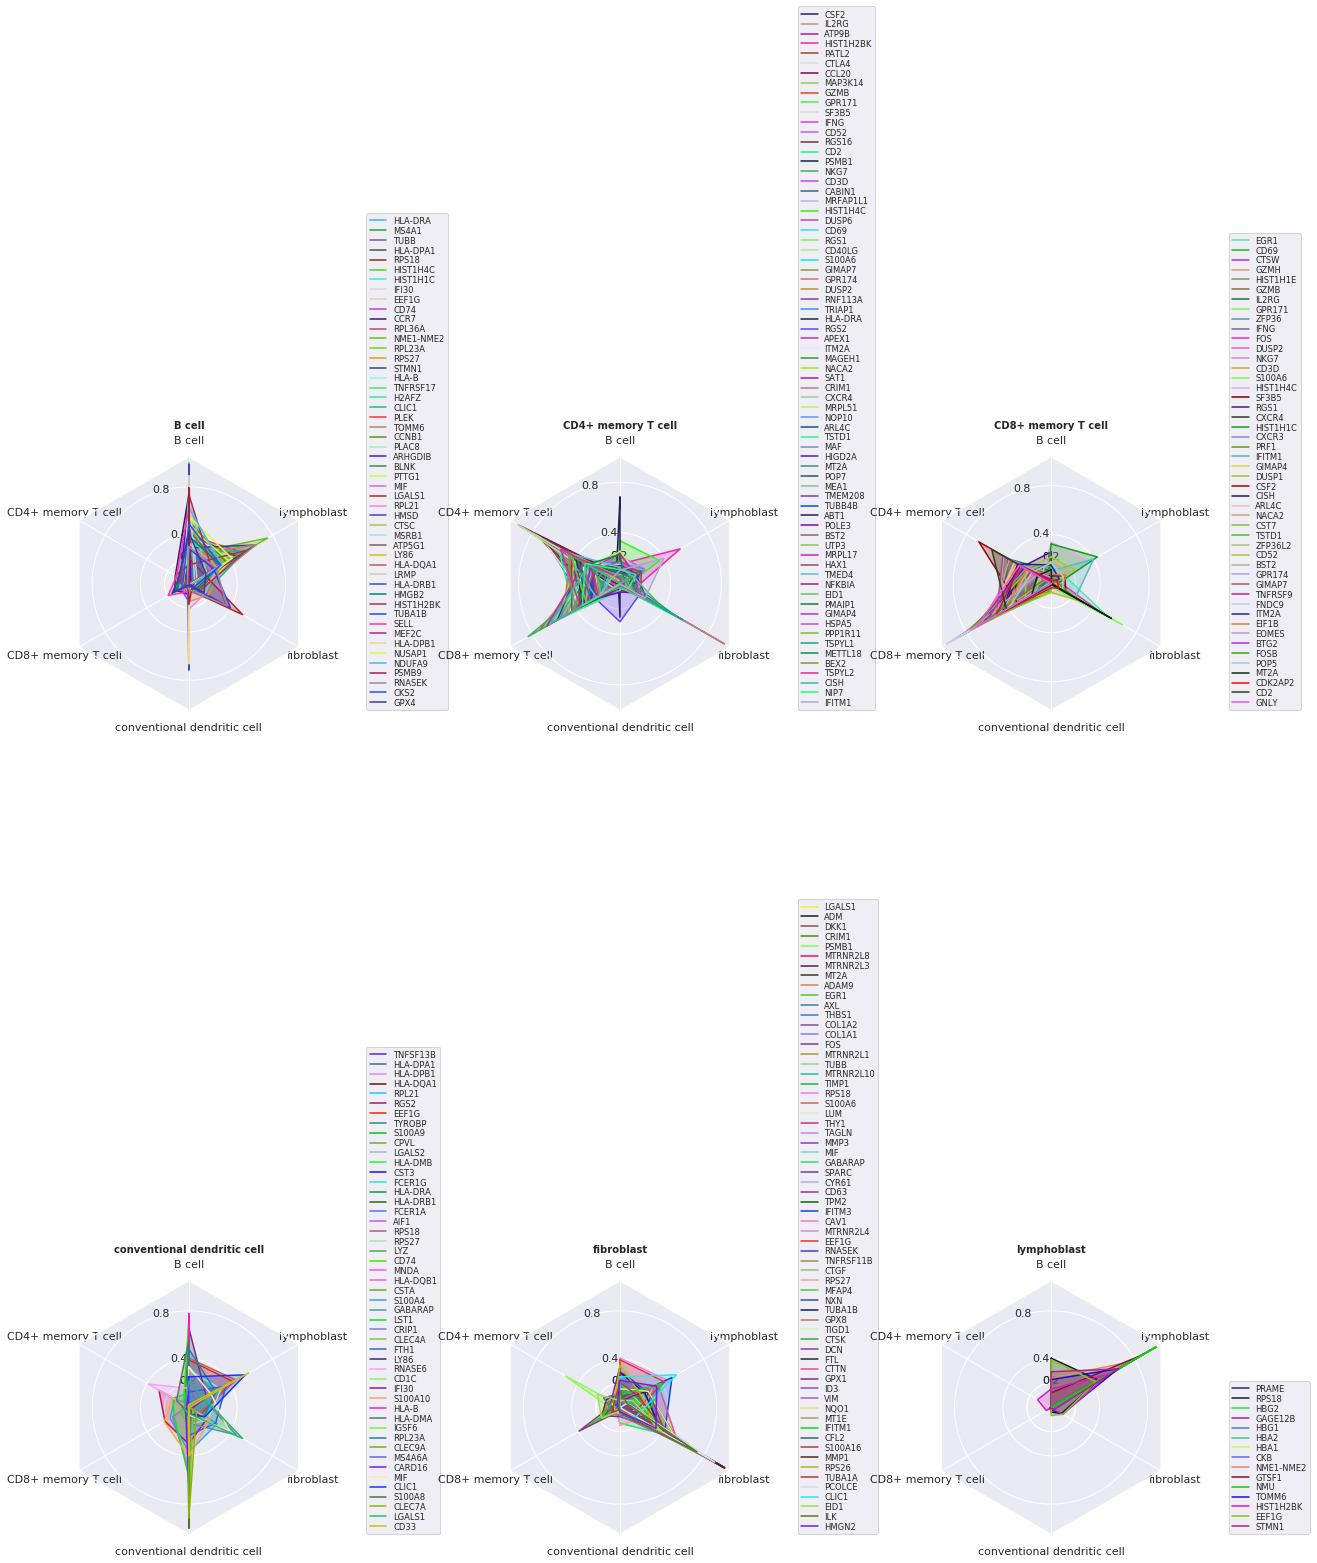

In [19]:
xx=mictiObject.get_Radar_plot()

# Enrichment results for significantlly cell-type spacific marker genes:


Get gene-over representation enrichment analysis result for cell-type marker genes we previously analyzed for CD4+ cell-type:

In [20]:
mictiObject.get_gene_list_over_representation_analysis(list(sig_genes.index))


,query.number,significant,p.value,term.size,query.size,overlap.size,recall,precision,term.id,domain,subgraph.number,term.name,relative.depth,intersection
term.id,,,,,,,,,,,,,,
KEGG:04660,1,True,0.000023,101,34,7,0.206,0.069,KEGG:04660,keg,11,T cell receptor signaling pathway,1,"MAP3K14,NFKBIA,CD40LG,IFNG,CTLA4,CSF2,CD3D"
REAC:R-HSA-1280215,1,True,0.000150,687,45,14,0.311,0.020,REAC:R-HSA-1280215,rea,12,Cytokine Signaling in Immune system,1,"MAP3K14,PSMB1,NFKBIA,CD40LG,IFNG,CISH,CCL20,MT..."
KEGG:04658,1,True,0.000222,90,34,6,0.176,0.067,KEGG:04658,keg,2,Th1 and Th2 cell differentiation,1,"NFKBIA,IFNG,IL2RG,CD3D,MAF,HLA-DRA"
KEGG:05330,1,True,0.001340,35,34,4,0.118,0.114,KEGG:05330,keg,16,Allograft rejection,1,"GZMB,CD40LG,IFNG,HLA-DRA"
KEGG:05323,1,True,0.003120,86,34,5,0.147,0.058,KEGG:05323,keg,15,Rheumatoid arthritis,1,"IFNG,CCL20,CTLA4,CSF2,HLA-DRA"
KEGG:04672,1,True,0.004020,46,34,4,0.118,0.087,KEGG:04672,keg,10,Intestinal immune network for IgA production,1,"MAP3K14,CD40LG,CXCR4,HLA-DRA"
KEGG:05320,1,True,0.005600,50,34,4,0.118,0.080,KEGG:05320,keg,14,Autoimmune thyroid disease,1,"GZMB,CD40LG,CTLA4,HLA-DRA"
KEGG:04659,1,True,0.008120,105,34,5,0.147,0.048,KEGG:04659,keg,5,Th17 cell differentiation,1,"NFKBIA,IFNG,IL2RG,CD3D,HLA-DRA"
KEGG:05166,1,True,0.009830,253,34,7,0.206,0.028,KEGG:05166,keg,17,Human T-cell leukemia virus 1 infection,1,"MAP3K14,NFKBIA,IL2RG,POLE3,CSF2,CD3D,HLA-DRA"


In [21]:
Top_n_Gene_List_Enrichment_results=mictiObject.get_gene_over_representation_for_topn_genes(topn=20)

Cluster B cell (174 cells)
['HLA-DRA', 'MS4A1', 'TUBB', 'HLA-DPA1', 'RPS18', 'HIST1H4C', 'HIST1H1C', 'IFI30', 'EEF1G', 'CD74', 'CCR7', 'RPL36A', 'NME1-NME2', 'RPL23A', 'RPS27', 'STMN1', 'HLA-B', 'TNFRSF17', 'H2AFZ', 'CLIC1']

Cluster CD4+ memory T cell (393 cells)
['CSF2', 'NKG7', 'PSMB1', 'CD2', 'RGS16', 'CD52', 'IFNG', 'SF3B5', 'CD3D', 'GZMB', 'MAP3K14', 'CCL20', 'CTLA4', 'PATL2', 'HIST1H2BK', 'ATP9B', 'IL2RG', 'GPR171', 'CABIN1', 'MRFAP1L1']

Cluster CD8+ memory T cell (263 cells)
['EGR1', 'NKG7', 'DUSP2', 'FOS', 'IFNG', 'ZFP36', 'CD3D', 'IL2RG', 'GZMB', 'HIST1H1E', 'GZMH', 'GPR171', 'CTSW', 'CD69', 'S100A6', 'HIST1H4C', 'SF3B5', 'RGS1', 'CXCR4', 'HIST1H1C']

Cluster conventional dendritic cell (105 cells)
['TNFSF13B', 'CD74', 'LYZ', 'RPS27', 'RPS18', 'AIF1', 'FCER1A', 'HLA-DRB1', 'HLA-DRA', 'FCER1G', 'CST3', 'HLA-DMB', 'LGALS2', 'CPVL', 'S100A9', 'TYROBP', 'EEF1G', 'RGS2', 'RPL21', 'HLA-DQA1']

Cluster fibroblast (159 cells)
['LGALS1', 'MTRNR2L10', 'FOS', 'MTRNR2L1', 'TUBB', 'LUM',

# MICTI on -GSE86469 human pancreatic islet cell signatures 

In [41]:
GSE86469=MARKER.GeoMinner.GEOMinner("GSE86469")

{'GPL18573': {'title': 'Illumina NextSeq 500 (Homo sapiens)', None: '\n    ', 'organism': 'Homo sapiens', 'manufacture-protocol': '\n    ', 'submission-date': '2014-04-15', 'distribution': 'virtual', 'technology': 'high-throughput sequencing', 'accession': 'GPL18573', 'last-update-date': '2019-03-26', 'manufacturer': None, 'contact-ref': '\n  ', 'status': None, 'release-date': '2014-04-15'}}


In [42]:
metadata=pa.DataFrame(GSE86469.getSamples()).T
cell_type=[i.split("\n")[1] for i in pa.DataFrame(GSE86469.getSamples()).T.loc[:,"cell type"]]

In [43]:
metadata["cell type"]=cell_type

In [46]:
metadata.iloc[:10,:10]

,None,tissue,race,extract-protocol,series_accsesion,channel,source,Sex,characteristics,cell type
GSM2303146,,Pancreatic Islet,White,Single Cell Processing on the C1 Single Cell ...,GSE86469,None,None,Female,ACIW009,None/Other
GSM2303147,,Pancreatic Islet,White,Single Cell Processing on the C1 Single Cell ...,GSE86469,None,None,Female,ACIW009,Beta
GSM2303148,,Pancreatic Islet,White,Single Cell Processing on the C1 Single Cell ...,GSE86469,None,None,Female,ACIW009,Beta
GSM2303149,,Pancreatic Islet,White,Single Cell Processing on the C1 Single Cell ...,GSE86469,None,None,Female,ACIW009,Beta
GSM2303150,,Pancreatic Islet,White,Single Cell Processing on the C1 Single Cell ...,GSE86469,None,None,Female,ACIW009,None/Other
GSM2303151,,Pancreatic Islet,White,Single Cell Processing on the C1 Single Cell ...,GSE86469,None,None,Female,ACIW009,Beta
GSM2303152,,Pancreatic Islet,White,Single Cell Processing on the C1 Single Cell ...,GSE86469,None,None,Female,ACIW009,Stellate
GSM2303153,,Pancreatic Islet,White,Single Cell Processing on the C1 Single Cell ...,GSE86469,None,None,Female,ACIW009,Beta
GSM2303154,,Pancreatic Islet,White,Single Cell Processing on the C1 Single Cell ...,GSE86469,None,None,Female,ACIW009,Beta
GSM2303155,,Pancreatic Islet,White,Single Cell Processing on the C1 Single Cell ...,GSE86469,None,None,Female,ACIW009,Beta


In [26]:
set(cell_type)

{'Acinar',
 'Alpha',
 'Beta',
 'Delta',
 'Ductal',
 'Gamma/PP',
 'None/Other',
 'Stellate'}

In [27]:
data=pa.read_csv("data/GSE86469_GEO.islet.single.cell.processed.data.RSEM.raw.expected.counts.csv", sep=",", index_col="Unnamed: 0")

In [28]:
data.iloc[:10,:10]

,10th_C10_S104,10th_C11_S96,10th_C13_S61,10th_C14_S53,10th_C16_S105,10th_C17_S97,10th_C19_S62,10th_C1_S59,10th_C20_S54,10th_C23_S98
ENSG00000229483,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000232849,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000229558,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000232977,0.00,0.00,1.64,1.64,0.00,0.88,0.00,1.70,2.49,2.98
ENSG00000227893,22.02,2.04,6.92,5.64,4.47,0.00,21.44,2.15,0.33,13.04
ENSG00000238230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000227640,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000260962,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000228741,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000247400,0.00,0.00,120.00,0.00,0.00,0.00,0.00,0.00,78.00,0.00


In [29]:
gene_symbol=MARKER.normalize.ENSEMBLID_to_geneSymbol(list(data.index))

In [30]:
CellNames=list(data.columns)
GeneNamees=gene_symbol

In [31]:
mictiObject_1=MARKER.MICTI(data.T, GeneNamees, CellNames, cluster_assignment=cell_type , k=None, th=0, UMI=False,normalized=True, ensembel=False)#, organisum="hsapiens")

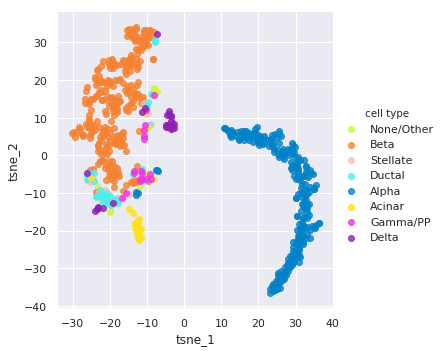

In [32]:
mictiObject_1.get_Visualization(dim=2, method="tsne")

In [33]:
set(cell_type)

{'Acinar',
 'Alpha',
 'Beta',
 'Delta',
 'Ductal',
 'Gamma/PP',
 'None/Other',
 'Stellate'}

In [34]:
sig_genes_1=mictiObject_1.get_markers_by_Pvalues_and_Zscore(0, threshold_pvalue=.01,threshold_z_score=0)
sig_genes_1

,Adj P-value,Z_scores,p_value
REG1A,0.000000e+00,86.540388,0.000000e+00
CTRB1,0.000000e+00,17.715766,0.000000e+00
CTRB2,0.000000e+00,27.586588,0.000000e+00
AMY2A,0.000000e+00,9.653276,0.000000e+00
PRSS3,0.000000e+00,10.941113,0.000000e+00
REG1B,0.000000e+00,49.676978,0.000000e+00
CPA2,0.000000e+00,16.925487,0.000000e+00
PLA2G1B,0.000000e+00,12.898128,0.000000e+00
CELA3A,0.000000e+00,40.416834,0.000000e+00
CPB1,0.000000e+00,21.568604,0.000000e+00


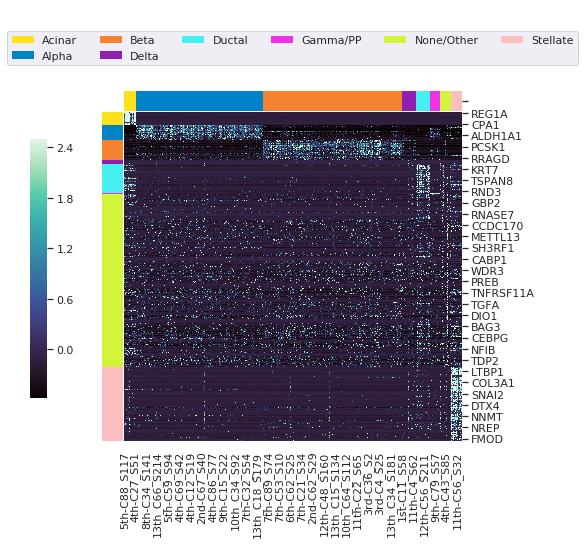

In [35]:
mictiObject_1.heatMap()

In [36]:
mictiObject_1.get_gene_list_over_representation_analysis(list(sig_genes_1.index))

,query.number,significant,p.value,term.size,query.size,overlap.size,recall,precision,term.id,domain,subgraph.number,term.name,relative.depth,intersection
term.id,,,,,,,,,,,,,,
KEGG:04972,1,True,7.720000e-19,96,12,11,0.917,0.115,KEGG:04972,keg,8,Pancreatic secretion,1,"PRSS3,CPA1,CELA3A,CPB1,CPA2,CTRB1,PLA2G1B,PNLI..."
KEGG:04974,1,True,1.030000e-11,90,12,8,0.667,0.089,KEGG:04974,keg,43,Protein digestion and absorption,1,"PRSS3,CPA1,CELA3A,CPB1,CPA2,CTRB1,PRSS1,CELA3B"
GO:0005615,1,True,3.740000e-09,3385,18,17,0.944,0.005,GO:0005615,CC,2,extracellular space,3,"PRSS3,CPA1,OLFM4,REG1A,CELA3A,CPB1,CPA2,SPINK1..."
GO:0005576,1,True,6.050000e-09,4453,18,18,1.000,0.004,GO:0005576,CC,2,extracellular region,1,"PRSS3,CPA1,OLFM4,REG1A,CLPS,CELA3A,CPB1,CPA2,S..."
GO:0044421,1,True,1.050000e-08,3598,18,17,0.944,0.005,GO:0044421,CC,2,extracellular region part,2,"PRSS3,CPA1,OLFM4,REG1A,CELA3A,CPB1,CPA2,SPINK1..."
GO:0007586,1,True,3.240000e-08,130,18,7,0.389,0.054,GO:0007586,BP,75,digestion,1,"PRSS3,CLPS,CTRB1,CTRB2,PNLIP,PRSS1,AMY2A"
REAC:R-HSA-196741,1,True,9.160000e-07,21,11,4,0.364,0.190,REAC:R-HSA-196741,rea,15,"Cobalamin (Cbl, vitamin B12) transport an...",3,"PRSS3,CTRB1,CTRB2,PRSS1"
REAC:R-HSA-196854,1,True,3.140000e-06,189,11,6,0.545,0.032,REAC:R-HSA-196854,rea,15,Metabolism of vitamins and cofactors,1,"PRSS3,CLPS,CTRB1,CTRB2,PNLIP,PRSS1"
GO:0070011,1,True,6.900000e-06,694,18,9,0.500,0.013,GO:0070011,MF,17,"peptidase activity, acting on L-amino aci...",3,"PRSS3,CPA1,CELA3A,CPB1,CPA2,CTRB1,CTRB2,PRSS1,..."


# MICTI on the simulated data 

In [37]:
data_sim=pa.read_csv("data/scSimulated_data_withSymsim1.txt", sep="\t")
cell_type=list(pa.read_csv("data/scSimulated_Metadata_withSymsim1.txt", sep="\t")["pop"])

cellNames = ['_'.join(["cell", str(i)]) for i in range(data_sim.shape[1])]

geneNames=['_'.join(["gene", str(i)]) for i in range(data_sim.shape[0])]

Simulated dataset using SysSim R package for single cell RNA-seq data with 5000 genes and in 200 cells

In [38]:
mictiObject_2=MARKER.MICTI(data_sim.T, geneNames, cellNames, cluster_assignment=cell_type, k=None, th=0, ensembel=False, normalized=False, UMI=True, organisum="hsapiens")

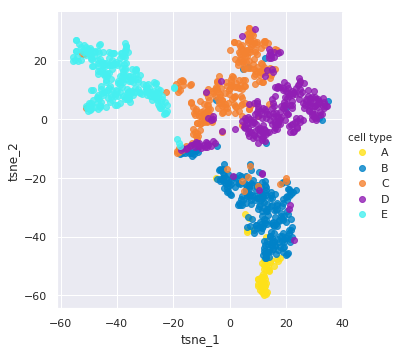

In [39]:
mictiObject_2.get_Visualization(dim=2, method="tsne")

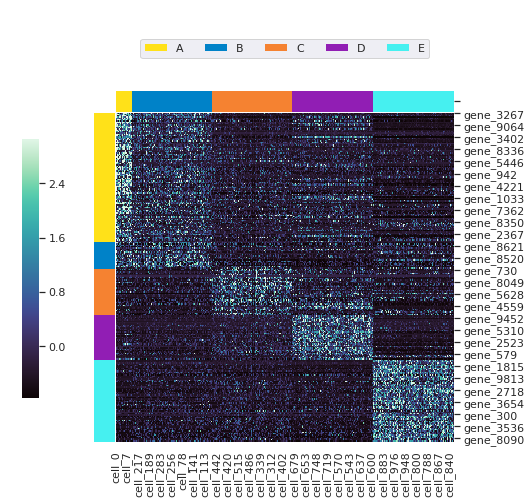

In [40]:
mictiObject_2.heatMap()